In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [109]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

In [110]:
df = pd.read_csv("breast-cancer-dataset.csv")
df

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
208,209,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,210,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,211,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,212,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [111]:
df.isna().sum()

S/N                 0
Year                0
Age                 0
Menopause           0
Tumor Size (cm)     0
Inv-Nodes           0
Breast              0
Metastasis          0
Breast Quadrant     0
History             0
Diagnosis Result    0
dtype: int64

In [112]:
df.duplicated().sum()

0

In [113]:
df["Diagnosis Result"].value_counts()

Diagnosis Result
Benign       120
Malignant     93
Name: count, dtype: int64

In [114]:
df["Breast Quadrant"].value_counts()

Breast Quadrant
Upper outer     67
Lower outer     54
Upper inner     45
Lower inner     44
#                2
Upper outer      1
Name: count, dtype: int64

In [115]:
df["Breast"].value_counts()

Breast
Left     107
Right    100
#          6
Name: count, dtype: int64

In [116]:
df.drop("S/N", inplace=True, axis=1)

In [117]:
df

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...
208,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [118]:
df.dtypes

Year                object
Age                  int64
Menopause            int64
Tumor Size (cm)     object
Inv-Nodes           object
Breast              object
Metastasis          object
Breast Quadrant     object
History             object
Diagnosis Result    object
dtype: object

In [119]:
for col in df.columns:
  df = df[df[col]!= "#"]
df

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...
208,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [120]:
df["Breast"] = df["Breast"].apply(lambda x: 1 if x == "Right" else 0)
df["Diagnosis Result"] = df["Diagnosis Result"].apply(lambda x: 1 if x == "Malignant" else 0)
df["Tumor Size (cm)"] = df["Tumor Size (cm)"].apply(lambda x: int(x) if x else 0)
df["History"] = df["History"].apply(lambda x: int(x) if x else 0)
df["Inv-Nodes"] = df["Inv-Nodes"].apply(lambda x: int(x) if x else 0)
df["Metastasis"] = df["Metastasis"].apply(lambda x: int(x) if x else 0)
df["Year"] = df["Year"].apply(lambda x: int(x) if x else 0)


In [121]:
df

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,2019,40,1,2,0,1,0,Upper inner,0,0
1,2019,39,1,2,0,0,0,Upper outer,0,0
2,2019,45,0,4,0,0,0,Lower outer,0,0
3,2019,26,1,3,0,0,0,Lower inner,1,0
4,2019,21,1,1,0,1,0,Upper outer,1,0
...,...,...,...,...,...,...,...,...,...,...
208,2020,49,1,6,3,1,1,Lower inner,1,1
209,2020,28,1,3,0,0,0,Upper inner,0,0
210,2020,22,1,1,0,0,0,Upper outer,1,0
211,2020,19,1,1,0,0,0,Lower inner,1,0


In [122]:
df.dtypes

Year                 int64
Age                  int64
Menopause            int64
Tumor Size (cm)      int64
Inv-Nodes            int64
Breast               int64
Metastasis           int64
Breast Quadrant     object
History              int64
Diagnosis Result     int64
dtype: object

In [123]:
df["Tumor Size (cm)"].value_counts()

Tumor Size (cm)
3     33
4     31
2     30
1     28
5     26
6     17
7     14
8     11
10     7
9      6
14     1
12     1
Name: count, dtype: int64

In [124]:
df["History"].value_counts()

History
0    121
1     84
Name: count, dtype: int64

In [125]:
df[df["History"] == "#"]

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result


In [126]:
df["Menopause"].value_counts()

Menopause
1    136
0     69
Name: count, dtype: int64

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py

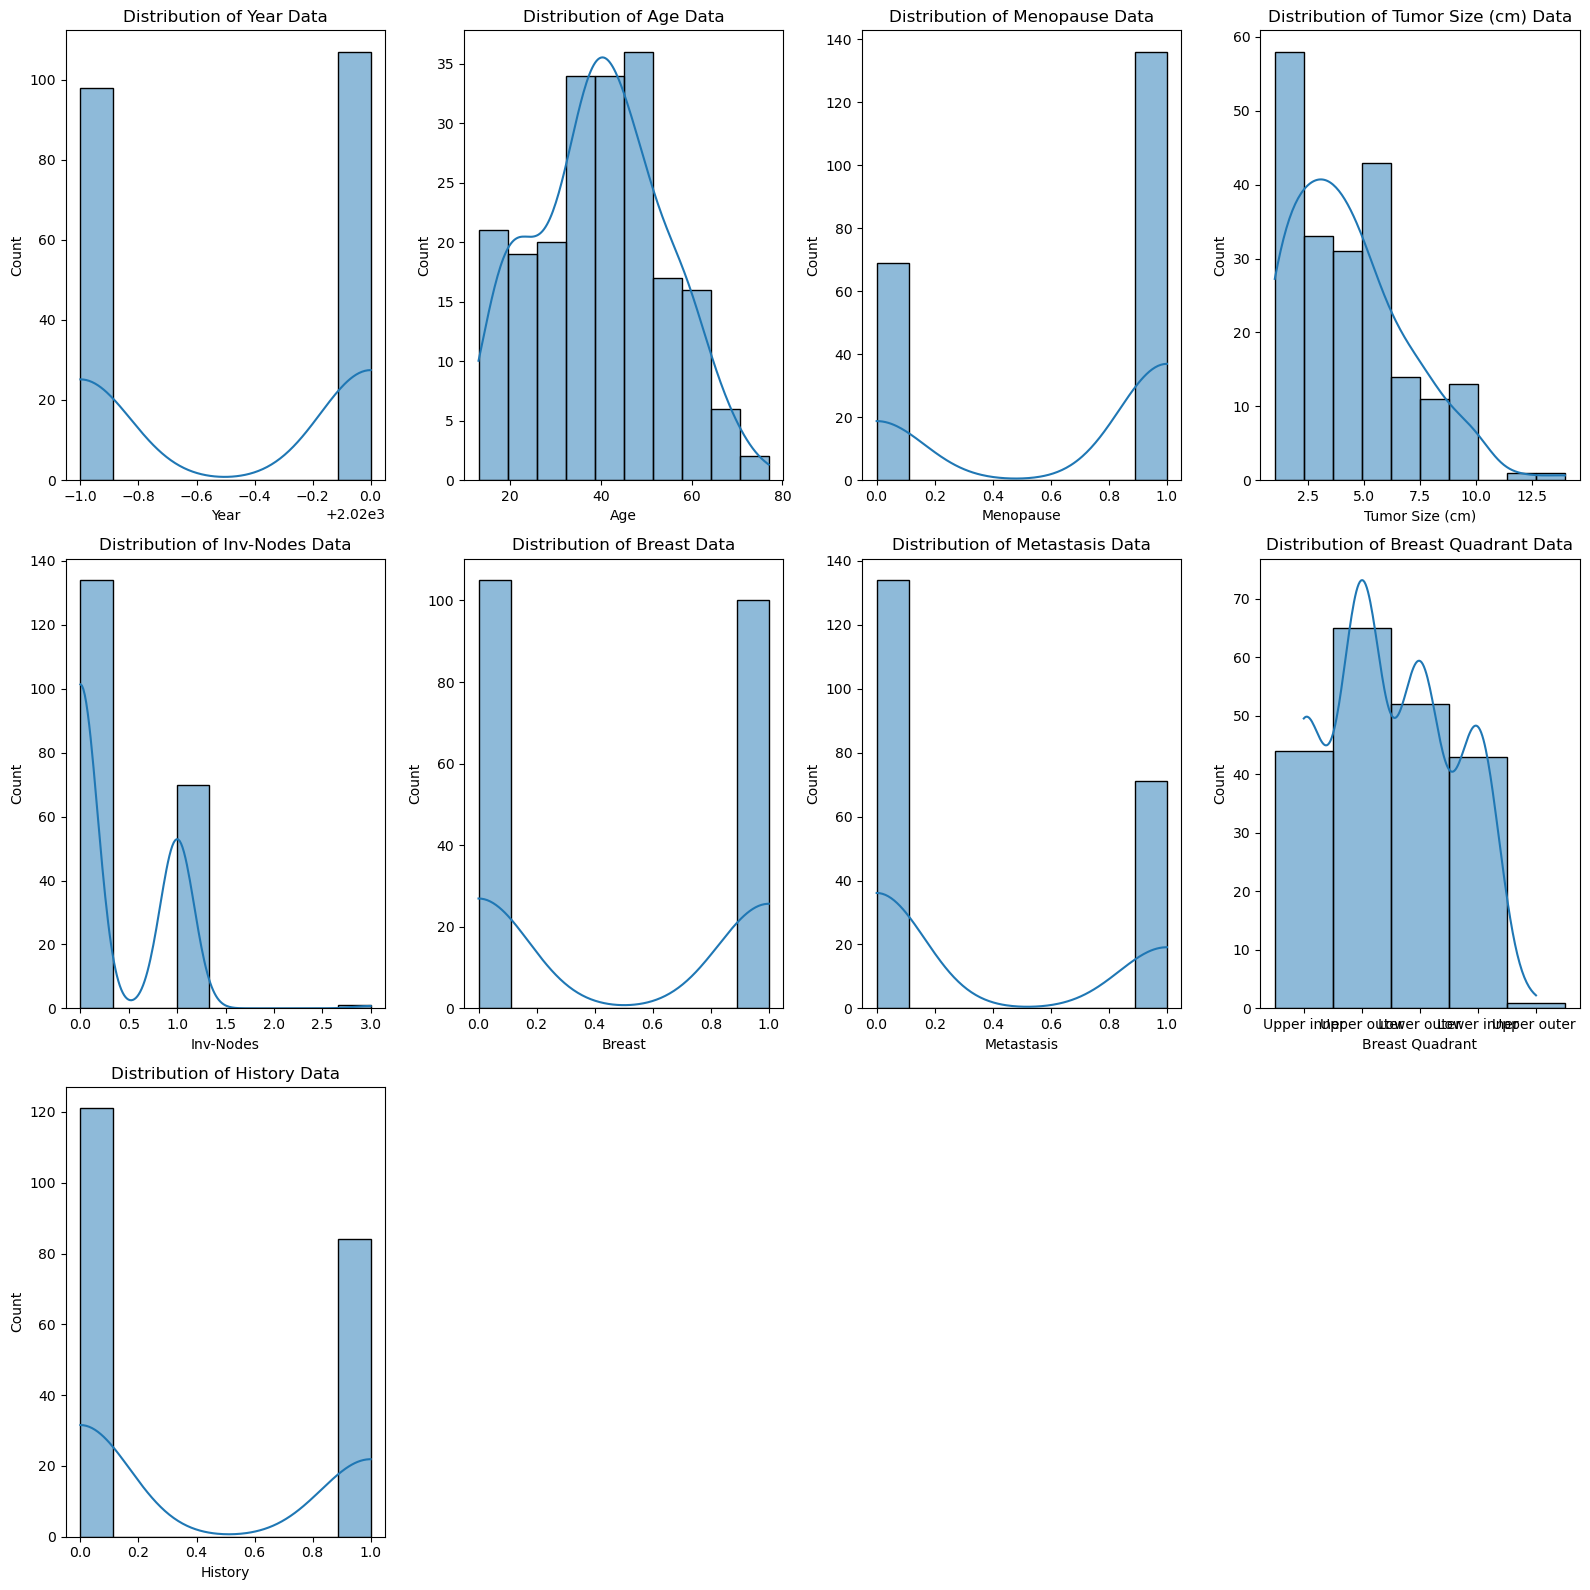

In [127]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

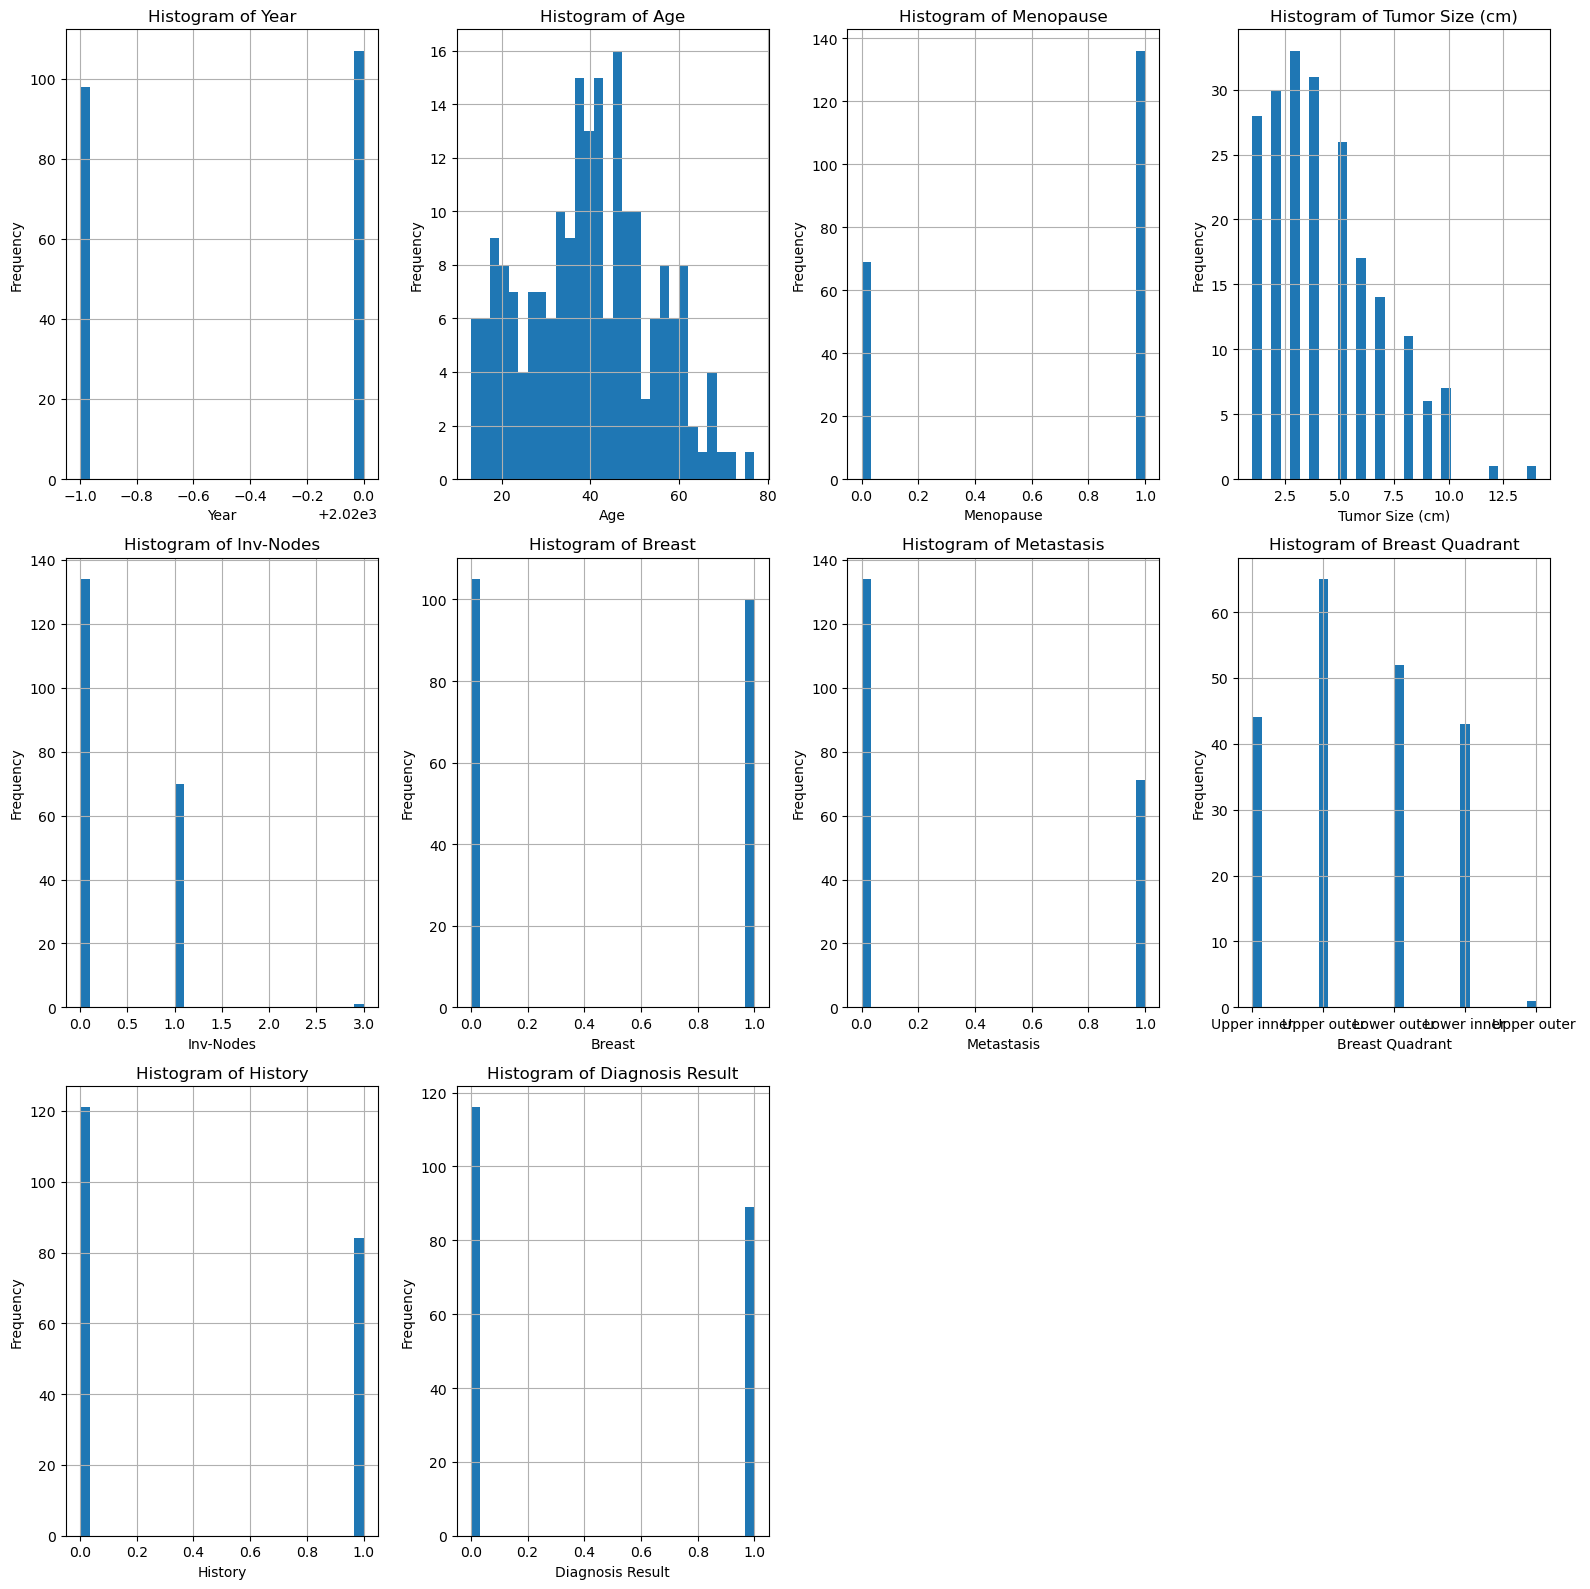

In [128]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns)  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up


for i, column in enumerate(df.columns):
    plt.subplot(rows, 4, i+1)
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.plot()

In [129]:
features_to_encode = ["Breast Quadrant"]

# Instantiate the encoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df[features_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(features_to_encode))

# Reset index of your original DataFrame if it's not in default sequential order
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the new encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Optionally, drop the original columns
df.drop(features_to_encode, axis=1, inplace=True)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<Axes: >

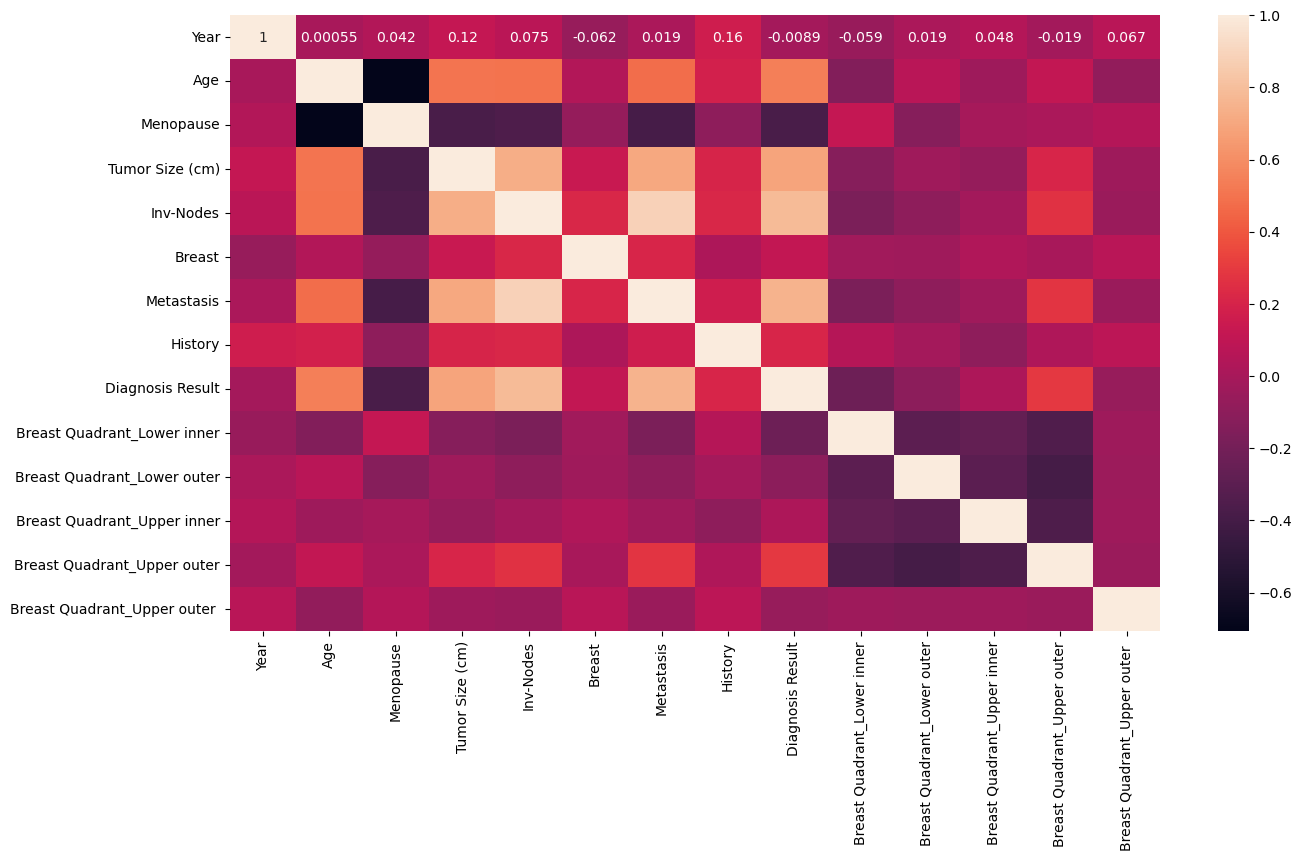

In [130]:
plt.figure(figsize=(15,8))
relations = df.corr()
sns.heatmap(data=relations, annot=True)

In [131]:
entropy_df = calculate_entropy(df)
entropy_df

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,History,Diagnosis Result,Breast Quadrant_Lower inner,Breast Quadrant_Lower outer,Breast Quadrant_Upper inner,Breast Quadrant_Upper outer,Breast Quadrant_Upper outer
entropy,0.998609,5.584152,0.921514,3.191314,0.967745,0.999571,0.930758,0.976372,0.98745,0.741016,0.817025,0.750248,0.90117,0.044481


In [132]:
X, y = df.drop("Diagnosis Result", axis=1), df["Diagnosis Result"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.8780487804878049
SVC Accuracy: 0.9024390243902439
DecisionTreeClassifier Accuracy: 0.8780487804878049
RandomForestClassifier Accuracy: 0.9024390243902439
KNeighborsClassifier Accuracy: 0.8780487804878049
GradientBoostingClassifier Accuracy: 0.8780487804878049
GaussianNB Accuracy: 0.5853658536585366
2/2 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.8293
Sequential Model Accuracy: 0.8292682766914368
Sequential Model Loss: 0.5237507224082947


,Model,Accuracy
0,LogisticRegression,0.878049
1,SVC,0.902439
2,DecisionTreeClassifier,0.878049
3,RandomForestClassifier,0.902439
4,KNeighborsClassifier,0.878049
5,GradientBoostingClassifier,0.878049
6,GaussianNB,0.585366
7,Sequential,0.829268


In [133]:
X, y = df.drop("Diagnosis Result", axis=1), df["Diagnosis Result"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.8536585365853658
SVC Accuracy: 0.8780487804878049
DecisionTreeClassifier Accuracy: 0.8780487804878049
RandomForestClassifier Accuracy: 0.9024390243902439
KNeighborsClassifier Accuracy: 0.8780487804878049
GradientBoostingClassifier Accuracy: 0.8780487804878049
GaussianNB Accuracy: 0.7804878048780488
2/2 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8293
Sequential Model Accuracy: 0.8292682766914368
Sequential Model Loss: 0.3788747489452362


,Model,Accuracy
0,LogisticRegression,0.853659
1,SVC,0.878049
2,DecisionTreeClassifier,0.878049
3,RandomForestClassifier,0.902439
4,KNeighborsClassifier,0.878049
5,GradientBoostingClassifier,0.878049
6,GaussianNB,0.780488
7,Sequential,0.829268


In [134]:
automate_pca(9, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)

LogisticRegression Accuracy: 0.8536585365853658
SVC Accuracy: 0.8780487804878049
DecisionTreeClassifier Accuracy: 0.8048780487804879
RandomForestClassifier Accuracy: 0.8048780487804879
KNeighborsClassifier Accuracy: 0.8536585365853658
GradientBoostingClassifier Accuracy: 0.7804878048780488
GaussianNB Accuracy: 0.8780487804878049
2/2 [==============================] - 0s 4ms/step - loss: 0.3943 - accuracy: 0.8293
Sequential Model Accuracy: 0.8292682766914368
Sequential Model Loss: 0.39427319169044495
                        Model  Accuracy
0          LogisticRegression  0.853659
1                         SVC  0.878049
2      DecisionTreeClassifier  0.804878
3      RandomForestClassifier  0.804878
4        KNeighborsClassifier  0.853659
5  GradientBoostingClassifier  0.780488
6                  GaussianNB  0.878049
7                  Sequential  0.829268


In [135]:
automate_pca(8, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)

LogisticRegression Accuracy: 0.8536585365853658
SVC Accuracy: 0.8780487804878049
DecisionTreeClassifier Accuracy: 0.8048780487804879
RandomForestClassifier Accuracy: 0.8780487804878049
KNeighborsClassifier Accuracy: 0.8780487804878049
GradientBoostingClassifier Accuracy: 0.8292682926829268
GaussianNB Accuracy: 0.8780487804878049
2/2 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8780
Sequential Model Accuracy: 0.8780487775802612
Sequential Model Loss: 0.36426112055778503
                        Model  Accuracy
0          LogisticRegression  0.853659
1                         SVC  0.878049
2      DecisionTreeClassifier  0.804878
3      RandomForestClassifier  0.878049
4        KNeighborsClassifier  0.878049
5  GradientBoostingClassifier  0.829268
6                  GaussianNB  0.878049
7                  Sequential  0.878049


In [136]:
automate_pca(7, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)

LogisticRegression Accuracy: 0.8536585365853658
SVC Accuracy: 0.8780487804878049
DecisionTreeClassifier Accuracy: 0.7804878048780488
RandomForestClassifier Accuracy: 0.8780487804878049
KNeighborsClassifier Accuracy: 0.8292682926829268
GradientBoostingClassifier Accuracy: 0.8048780487804879
GaussianNB Accuracy: 0.8536585365853658
2/2 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8537
Sequential Model Accuracy: 0.8536585569381714
Sequential Model Loss: 0.42574965953826904
                        Model  Accuracy
0          LogisticRegression  0.853659
1                         SVC  0.878049
2      DecisionTreeClassifier  0.780488
3      RandomForestClassifier  0.878049
4        KNeighborsClassifier  0.829268
5  GradientBoostingClassifier  0.804878
6                  GaussianNB  0.853659
7                  Sequential  0.853659


In [137]:
automate_pca(6, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)

LogisticRegression Accuracy: 0.8536585365853658
SVC Accuracy: 0.8780487804878049
DecisionTreeClassifier Accuracy: 0.8048780487804879
RandomForestClassifier Accuracy: 0.8536585365853658
KNeighborsClassifier Accuracy: 0.8780487804878049
GradientBoostingClassifier Accuracy: 0.8292682926829268
GaussianNB Accuracy: 0.8536585365853658
2/2 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8780
Sequential Model Accuracy: 0.8780487775802612
Sequential Model Loss: 0.43974965810775757
                        Model  Accuracy
0          LogisticRegression  0.853659
1                         SVC  0.878049
2      DecisionTreeClassifier  0.804878
3      RandomForestClassifier  0.853659
4        KNeighborsClassifier  0.878049
5  GradientBoostingClassifier  0.829268
6                  GaussianNB  0.853659
7                  Sequential  0.878049
